In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure













In [2]:
# Step 1: Read the image
img = cv2.imread('Task3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

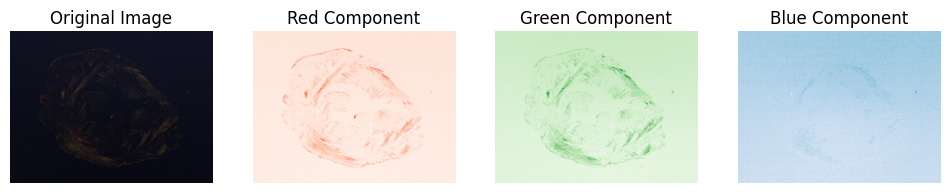

In [3]:

# Step 2: Display R, G, B components
r, g, b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1); plt.imshow(img_rgb); plt.title('Original Image'); plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(r, cmap='Reds'); plt.title('Red Component'); plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(g, cmap='Greens'); plt.title('Green Component'); plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(b, cmap='Blues'); plt.title('Blue Component'); plt.axis('off')
plt.show()

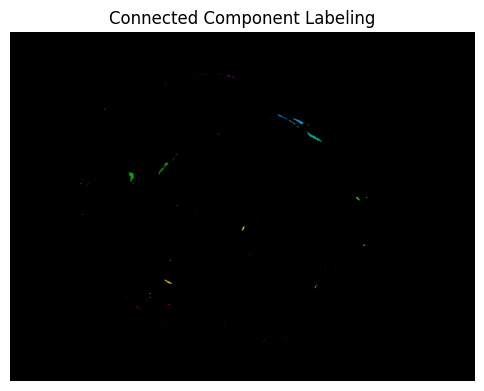

In [4]:
# Step 3: Connected Component Labeling (on grayscale)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
labels = measure.label(binary, connectivity=2)
plt.figure(figsize=(6, 5))
plt.imshow(labels, cmap='nipy_spectral')
plt.title('Connected Component Labeling')
plt.axis('off')
plt.show()

In [5]:

# Step 4: Histogram Equalization - Built-in Function
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_eq_builtin = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

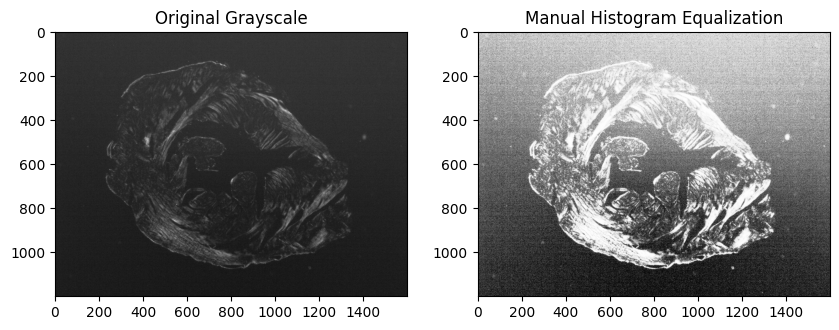

In [6]:
# Step 5: Histogram Equalization - Manual Implementation
def manual_hist_eq(img_gray):
    hist, bins = np.histogram(img_gray.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img_eq = cdf[img_gray]
    return img_eq

gray_eq_manual = manual_hist_eq(gray)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.imshow(gray, cmap='gray'); plt.title('Original Grayscale')
plt.subplot(1, 2, 2); plt.imshow(gray_eq_manual, cmap='gray'); plt.title('Manual Histogram Equalization')
plt.show()


In [7]:
# Step 6: Contrast Stretching
def contrast_stretch(img_gray):
    r_min, r_max = np.min(img_gray), np.max(img_gray)
    stretched = (img_gray - r_min) * (255 / (r_max - r_min))
    return stretched.astype(np.uint8)

contrast_img = contrast_stretch(gray)


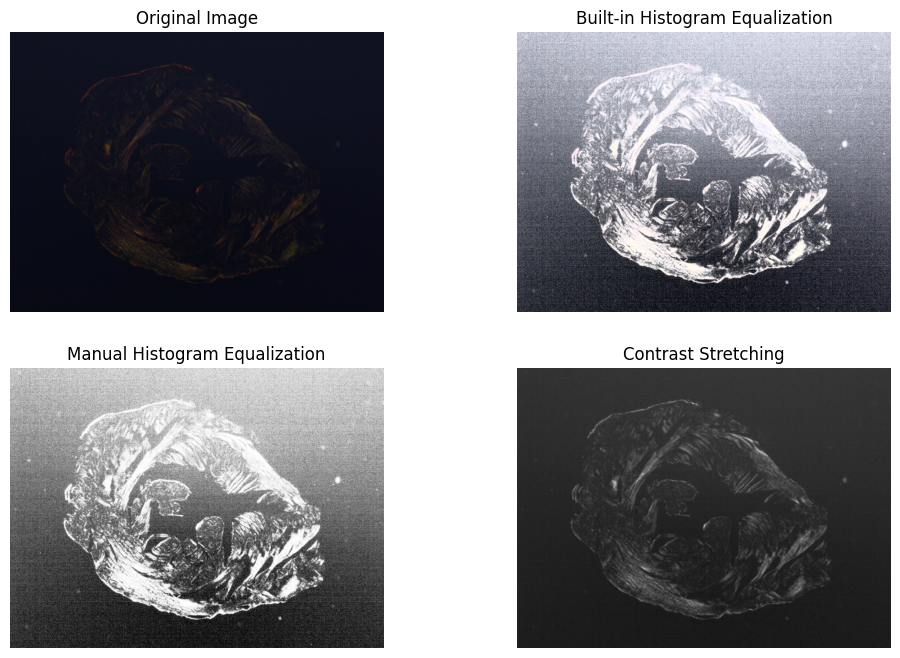

In [8]:
# Step 7: Comparison
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1); plt.imshow(img_rgb); plt.title('Original Image'); plt.axis('off')
plt.subplot(2, 2, 2); plt.imshow(img_eq_builtin); plt.title('Built-in Histogram Equalization'); plt.axis('off')
plt.subplot(2, 2, 3); plt.imshow(gray_eq_manual, cmap='gray'); plt.title('Manual Histogram Equalization'); plt.axis('off')
plt.subplot(2, 2, 4); plt.imshow(contrast_img, cmap='gray'); plt.title('Contrast Stretching'); plt.axis('off')
plt.show()

/tmp/ipython-input-3580439147.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 2, 1); plt.hist(gray.flatten(), 256, [0,256]); plt.title('Original Histogram')
/tmp/ipython-input-3580439147.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 2, 2); plt.hist(gray_eq_manual.flatten(), 256, [0,256]); plt.title('Manual Equalized Histogram')
/tmp/ipython-input-3580439147.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 2, 3); plt.hist(contrast_img.flatten(), 256, [0,256]); plt.title('Contrast Stretched Histogram')
/tmp/ipython-input-3580439147.py:6: MatplotlibDeprecationWarning: Passing

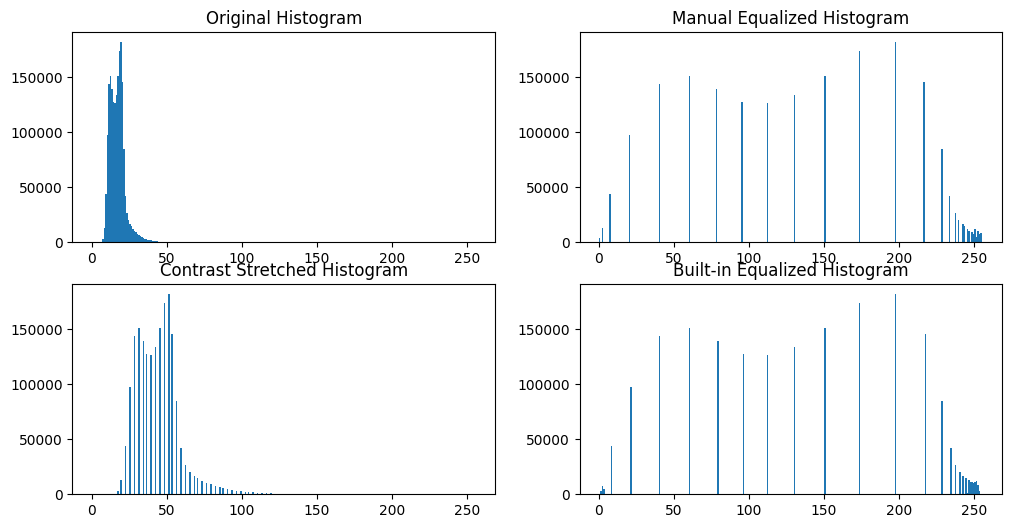

In [9]:
# Step 8: Plot Histograms for Comparison
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1); plt.hist(gray.flatten(), 256, [0,256]); plt.title('Original Histogram')
plt.subplot(2, 2, 2); plt.hist(gray_eq_manual.flatten(), 256, [0,256]); plt.title('Manual Equalized Histogram')
plt.subplot(2, 2, 3); plt.hist(contrast_img.flatten(), 256, [0,256]); plt.title('Contrast Stretched Histogram')
plt.subplot(2, 2, 4); plt.hist(cv2.cvtColor(img_eq_builtin, cv2.COLOR_RGB2GRAY).flatten(), 256, [0,256]); plt.title('Built-in Equalized Histogram')
plt.show()
